# 데이터 살펴보기

In [1]:
import pandas as pd
import numpy as np
import glob
from tqdm import tqdm

In [2]:
val = pd.read_csv("C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Code_Similarity\\sample_train.csv")
val.head()

,code1_path,code2_path,code1,code2,similar
0,./train_code/problem393/problem393_19.cpp,./train_code/problem033/problem033_439.cpp,#include <bits/stdc++.h>\n\nusing namespace st...,#include <algorithm>\n#include <bitset>\n#incl...,0
1,./train_code/problem019/problem019_210.cpp,./train_code/problem019/problem019_63.cpp,#include <iostream>\n\nusing namespace std;\n\...,#include <iostream>\n#include <string>\nusing ...,1
2,./train_code/problem107/problem107_486.cpp,./train_code/problem107/problem107_340.cpp,#include <iostream>\n#include <vector>\nusing ...,#include <cstdio>\n#include <cstdlib>\n#includ...,1
3,./train_code/problem187/problem187_257.cpp,./train_code/problem403/problem403_135.cpp,#include <bits/stdc++.h>\n#include <unordered_...,#include <bits/stdc++.h>\nusing namespace std;...,0
4,./train_code/problem173/problem173_490.cpp,./train_code/problem173/problem173_345.cpp,#include <bits/stdc++.h>\ntypedef long long ll...,"#include ""bits/stdc++.h""\n#define rep(i,n) for...",1


In [3]:
test = pd.read_csv("C:\\Users\\82102\\Desktop\\Machine_Learning\\DACON_materials\\Code_Similarity\\test.csv")
test.head()

,pair_id,code1,code2
0,TEST_000000,#include <bits/stdc++.h>\nusing namespace std;...,"#include <bits/stdc++.h>\n#define rep(i, n) fo..."
1,TEST_000001,"#include<bits/stdc++.h>\n#define rep(i,n)for(i...",// //bitset操作\n// #include <iostream>\n// #inc...
2,TEST_000002,#include <bits/stdc++.h>\nusing namespace std;...,#include <bits/stdc++.h>\n#include <ext/pb_ds/...
3,TEST_000003,#include <bits/stdc++.h>\nusing namespace std;...,#include <bits/stdc++.h>\nusing namespace std;...
4,TEST_000004,#include<bits/stdc++.h>\nusing namespace std;\...,#include<iostream>\n#include<algorithm>\n#incl...


0번째 샘플의 두 코드를 보자. 이 샘플의 similar label은 0으로, 두 코드는 다르다.

In [4]:
print(val["code1"][0])

#include <bits/stdc++.h>

using namespace std;
using ll = long long;
using vl = vector<ll>;
using pll = pair<ll, ll>;

#define rep(i, n) for (ll i = 0, xxx_rep_end = (n); i < xxx_rep_end; ++i)
#define all(x) (x).begin(), (x).end()

template <class T1, class T2>
inline bool chmax(T1 &a, const T2 &b) {
    if (a < b) {
        a = b;
        return true;
    }
    return false;
}
template <class T1, class T2>
inline bool chmin(T1 &a, const T2 &b) {
    if (a > b) {
        a = b;
        return true;
    }
    return false;
}

constexpr ll INF = 0x3f3f3f3f3f3f3f3fLL;
constexpr ll mod = 1000000007;

int main() {
    ll S;
    cin >> S;
    for (int i = 0; i < 3; ++i) {
        if (S % 10 == 7) {
            cout << "Yes" << endl;
            return 0;
        }
        S /= 10;
    }
    cout << "No" << endl;
}


In [5]:
print(val["code2"][0])

#include <algorithm>
#include <bitset>
#include <complex>
#include <deque>
#include <exception>
#include <fstream>
#include <functional>
#include <iomanip>
#include <ios>
#include <iosfwd>
#include <iostream>
#include <istream>
#include <iterator>
#include <limits>
#include <list>
#include <locale>
#include <map>
#include <memory>
#include <new>
#include <numeric>
#include <ostream>
#include <queue>
#include <set>
#include <sstream>
#include <stack>
#include <stdexcept>
#include <streambuf>
#include <string>
#include <typeinfo>
#include <utility>
#include <valarray>
#include <vector>
#include <climits>
#include <cstring>

#define rep(i, m, n) for(int i=int(m);i<int(n);i++)
#define all(c) begin(c),end(c)

template<typename T1, typename T2>
inline void chmin(T1 &a, T2 b) { if (a > b) a = b; }

template<typename T1, typename T2>
inline void chmax(T1 &a, T2 b) { if (a < b) a = b; }

//改造
typedef long long int ll;
using namespace std;
#define INF (1 << 30) - 1
#define INFl (ll)5e15
#define 

1번째 샘플을 살펴보자. 두 코드는 같다.

In [6]:
print(val["code1"][1])

#include <iostream>

using namespace std;

int main(void) {
  int times,h;
  string card,temp1,temp2;
  while(cin >> card && card[0] != '-') {
    cin >> times;
    for(int i = 0; i < times; i++) {
      cin >> h;
      temp1 = card.substr(0, h);
      temp2 = card.substr(h, card.length());
      card = temp2 + temp1;
    }
    cout << card << endl;
  }
  return 0;
}


In [7]:
print(val["code2"][1])

#include <iostream>
#include <string>
using namespace std;
int main(void)
{
    int m,h,i;
    string str;
    cin >> str;
    while(str != "-") {
        cin >> m;
        for(i=0;i<m;i++) {
            cin >> h;
            string left = str.substr(0,h);
            str.erase(0,h);
            str+=left;
        }
        cout << str << endl;
        cin >> str;
    }
}



모든 코드의 길이 정보를 요약해보자.

In [8]:
code1_len = []
code2_len = []

for i in range(len(val)):
    code1_len.append(len(val["code1"][i]))
    code2_len.append(len(val["code2"][i]))
print(max(code1_len))
print(max(code2_len))
print(min(code1_len))
print(min(code2_len))
print(sum(code1_len) / len(code1_len))
print(sum(code2_len) / len(code2_len))

20775
21243
54
71
875.9134
871.21725


일반적인 자연어 유사도 계산 알고리즘은 54~71 byte짜리 글에서 잘 작동할 것이다. 하지만 20000 byte를 넘어가는 코드에서는 과연...  
길이가 긴 코드는 그 안을 블럭화하여 데이터를 압축해야겠다.

code1_len list를 sort하고 코드 길이의 분포를 보자.

In [9]:
code1_len_sort = sorted(code1_len)

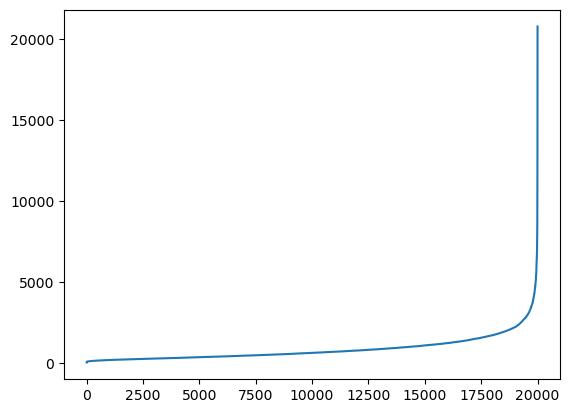

In [10]:
import matplotlib.pyplot as plt
plt.plot(code1_len_sort)

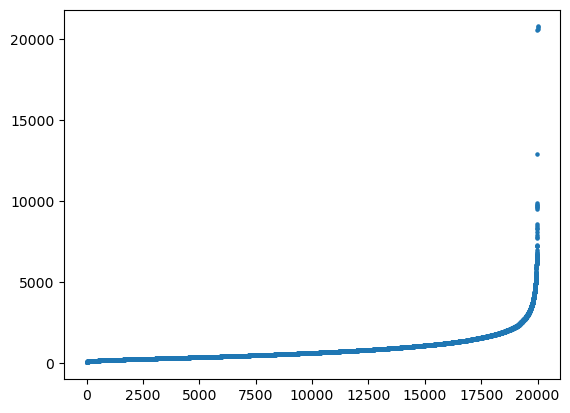

In [11]:
plt.scatter(range(len(code1_len_sort)), code1_len_sort, s=5)

In [12]:
len(code1_len_sort)

20000

In [13]:
def how_much_code_len(n):
    print("{0}자 이상: ".format(n), end="")
    for i in range(len(code1_len_sort)):
        if code1_len_sort[i] > n:
            print(len(code1_len_sort) - i)
            break
how_much_code_len(2000)
how_much_code_len(3000)
how_much_code_len(5000)
how_much_code_len(10000)
how_much_code_len(15000)
how_much_code_len(20000)

2000자 이상: 1389
3000자 이상: 440
5000자 이상: 85
10000자 이상: 5
15000자 이상: 4
20000자 이상: 4


총 20000개의 code 샘플중 길이가 10000이 넘는 샘플은 단 5개이다. 제외시켜도 될 것 같다.  
그래도 5000자는 여전이 일반적인 자연어 처리 알고리즘이 처리하는 문장 길이와는 크게 다르다.  
모델 후보를 찾아보면서 긴 코드 길이 문제를 해결할 방법을 생각해보자.

혹시 코드의 목적이 같다면 코드간 길이가 유사하다고 가정할 수 있지 않을까? 확인해보자.

In [14]:
multiple_0 = []
multiple_1 = []

for i in range(len(val)):
    if code1_len[i] >= code2_len[i]:
        multiple = code1_len[i]//code2_len[i]
    else:
        multiple = code2_len[i]//code1_len[i]
    if val["similar"][i]==1:
        multiple_1.append(multiple)
    else:
        multiple_0.append(multiple)
print("같은 코드간 길이차(배수) 평균: ", sum(multiple_1) / len(multiple_1))
print("다른 코드간 길이차(배수) 평균: ", sum(multiple_0) / len(multiple_0))

같은 코드간 길이차(배수) 평균:  1.8209
다른 코드간 길이차(배수) 평균:  2.523


확실히 같은 코드간 길이차가 상대적으로 적긴 하다. 하지만 서로 다른 코드가 같은 길이를 가질 수 있다. 따라서 코드 길이차가 큰 코드는 서로 다른 코드다 라고 가정을 축소해야 한다. 이 가설도 확인해보자.

In [15]:
print(max(multiple_1))

43


아.. 코드 길이가 43배 차이나는데 같은 동작을 수행하는 코드가 있다. 살펴보자.

In [16]:
for i in range(len(val)):
    if code1_len[i] >= code2_len[i]:
        multiple = code1_len[i]//code2_len[i]
    else:
        multiple = code2_len[i]//code1_len[i]
    if val["similar"][i]==1:
        if multiple == 43:
            print(i)

11542


In [17]:
print(val["code1"][11542])

// ConsoleApplication1.cpp : このファイルには 'main' 関数が含まれています。プログラム実行の開始と終了がそこで行われます。
//

//#include "pch.h"

#include <iostream>
#include <cmath>
#include <climits>
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <string>
#include <stack>
#include <algorithm>
#include <map>
#include <numeric>
#include <set>
#include <queue>
#include <bitset>
using namespace std;

#define ll long long
#define ld long double
#define pi 3.14159265359;
// %llu %lf

// v:vector  type:型  order:greater(大きい順) or less(小さい順)
#define _sort(v,type,order) do { sort(v.begin(),v.end(),order<type>()); } while(0)
// vector 要素の総和算出
// v:vector  default_value:初期値
#define _sum(v,default_value) accumulate(v.begin(),v.end(),default_value )
// vector 最大値( return ite )
#define _max_element(v) max_element(v.begin(),v.end())
// vector 最小値( return ite )
#define _min_element(v) min_element(v.begin(),v.end())
// vector 最大値が格納されている要素値
#define _max_element_number(v) distance(v.begin(),max_element(v.begin(),v.end()))
// 

In [18]:
print(val["code2"][11542])

#include <iostream>
using namespace std;
int main() {
	char c;
	cin >> c;
	cout << ++c;
}


주석, #include, #define이 많이 들어갔다. 주석은 그냥 쳐내도 되겠지만, #include와 #define은 의미 있는 정보이다. 어떻게 다뤄야 할까?  
나중에 어셈블리어로 바꿨을 땐 #include, #define, class, function을 다 구분해서 각각 유사도를 검사할 것므로 괜찮을 것이다.
지금은 데이터 살펴보기 단계이므로 #들을 어떻게 처리해야 할지는 그만 고민하고 넘어가자. 코드 유사도에 따른 길이 차이 분석은 여기서 끝.

## 목적 정의

두 코드간 유사성을 판단 -> 서로 동일한 문제를 해결하는지를 판단

## 특별한 점

1. c++코드임
2. 

## 아이디어

1. 전처리: 주석을 모두 제거, 헤더를 모두 제거, class - function - 기타 순서대로 정렬
2. 

## 해결해야할 것

1. 어떻게 주석을 판단할 것인지, 그리고 판단된 주석을 어떻게 제거할 것인지.

# 모델 후보

1. [SentenceBERT, sentence-transformer](https://velog.io/@jaehyeong/Basic-NLP-sentence-transformers-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-SBERT-%ED%95%99%EC%8A%B5-%EB%B0%A9%EB%B2%95)  


# 데이터 전처리

### 주석 제거

In [90]:
val_copy = val[['code1', 'code2', 'similar']]

In [20]:
val_copy

,code1,code2,similar
0,#include <bits/stdc++.h>\n\nusing namespace st...,#include <algorithm>\n#include <bitset>\n#incl...,0
1,#include <iostream>\n\nusing namespace std;\n\...,#include <iostream>\n#include <string>\nusing ...,1
2,#include <iostream>\n#include <vector>\nusing ...,#include <cstdio>\n#include <cstdlib>\n#includ...,1
3,#include <bits/stdc++.h>\n#include <unordered_...,#include <bits/stdc++.h>\nusing namespace std;...,0
4,#include <bits/stdc++.h>\ntypedef long long ll...,"#include ""bits/stdc++.h""\n#define rep(i,n) for...",1
...,...,...,...
19995,#include <bits/stdc++.h>\nusing namespace std;...,#include<iostream>\nusing namespace std;\n\nin...,0
19996,"#include <bits/stdc++.h>\n\n#define For(i, j, ...",#include<bits/stdc++.h>\n#include <ext/pb_ds/a...,0
19997,"#include <bits/stdc++.h>\n#define rep(i, a, n)...",#include<iostream>\nusing namespace std;\nint...,1
19998,#include <bits/stdc++.h>\n#define MOD 10000000...,#include <bits/stdc++.h>\n\nusing namespace st...,1


코드를 원본으로 보자

In [21]:
val_copy['code2'][0]

'#include <algorithm>\n#include <bitset>\n#include <complex>\n#include <deque>\n#include <exception>\n#include <fstream>\n#include <functional>\n#include <iomanip>\n#include <ios>\n#include <iosfwd>\n#include <iostream>\n#include <istream>\n#include <iterator>\n#include <limits>\n#include <list>\n#include <locale>\n#include <map>\n#include <memory>\n#include <new>\n#include <numeric>\n#include <ostream>\n#include <queue>\n#include <set>\n#include <sstream>\n#include <stack>\n#include <stdexcept>\n#include <streambuf>\n#include <string>\n#include <typeinfo>\n#include <utility>\n#include <valarray>\n#include <vector>\n#include <climits>\n#include <cstring>\n\n#define rep(i, m, n) for(int i=int(m);i<int(n);i++)\n#define all(c) begin(c),end(c)\n\ntemplate<typename T1, typename T2>\ninline void chmin(T1 &a, T2 b) { if (a > b) a = b; }\n\ntemplate<typename T1, typename T2>\ninline void chmax(T1 &a, T2 b) { if (a < b) a = b; }\n\n//改造\ntypedef long long int ll;\nusing namespace std;\n#define 

In [22]:
val_copy['code2'][0][0]

'#'

주석은 //뒤에 오며 \n 전까지 이어진다. 이를 제거해주자.

In [73]:
txt = val_copy['code2'][0]
two_geul = [0, 0]
juseok_ind = [len(txt)]
julbakkum_ind = [0]
juseok_flag = False
for i in range(len(txt)):
    two_geul[0] = two_geul[1]
    two_geul[1] = txt[i]
    if two_geul == ['/', '/']:
        juseok_ind.insert(juseok_ind.index(len(txt)), i-1)
        juseok_flag = True
    if juseok_flag:
        if two_geul[1] == '\n':
            julbakkum_ind.append(i)
            juseok_flag = False

In [74]:
juseok_ind

[892, 1008, 1100, 1664]

In [75]:
julbakkum_ind

[0, 896, 1022, 1110]

In [76]:
val_copy['code2'][0][896]

'\n'

In [77]:
new_txt = ""
for i in range(len(juseok_ind)):
    new_txt += (txt[julbakkum_ind[i]:juseok_ind[i]])
print(new_txt)

#include <algorithm>
#include <bitset>
#include <complex>
#include <deque>
#include <exception>
#include <fstream>
#include <functional>
#include <iomanip>
#include <ios>
#include <iosfwd>
#include <iostream>
#include <istream>
#include <iterator>
#include <limits>
#include <list>
#include <locale>
#include <map>
#include <memory>
#include <new>
#include <numeric>
#include <ostream>
#include <queue>
#include <set>
#include <sstream>
#include <stack>
#include <stdexcept>
#include <streambuf>
#include <string>
#include <typeinfo>
#include <utility>
#include <valarray>
#include <vector>
#include <climits>
#include <cstring>

#define rep(i, m, n) for(int i=int(m);i<int(n);i++)
#define all(c) begin(c),end(c)

template<typename T1, typename T2>
inline void chmin(T1 &a, T2 b) { if (a > b) a = b; }

template<typename T1, typename T2>
inline void chmax(T1 &a, T2 b) { if (a < b) a = b; }


typedef long long int ll;
using namespace std;
#define INF (1 << 30) - 1
#define INFl (ll)5e15
#define DEBU

In [78]:
print(val_copy['code2'][0])

#include <algorithm>
#include <bitset>
#include <complex>
#include <deque>
#include <exception>
#include <fstream>
#include <functional>
#include <iomanip>
#include <ios>
#include <iosfwd>
#include <iostream>
#include <istream>
#include <iterator>
#include <limits>
#include <list>
#include <locale>
#include <map>
#include <memory>
#include <new>
#include <numeric>
#include <ostream>
#include <queue>
#include <set>
#include <sstream>
#include <stack>
#include <stdexcept>
#include <streambuf>
#include <string>
#include <typeinfo>
#include <utility>
#include <valarray>
#include <vector>
#include <climits>
#include <cstring>

#define rep(i, m, n) for(int i=int(m);i<int(n);i++)
#define all(c) begin(c),end(c)

template<typename T1, typename T2>
inline void chmin(T1 &a, T2 b) { if (a > b) a = b; }

template<typename T1, typename T2>
inline void chmax(T1 &a, T2 b) { if (a < b) a = b; }

//改造
typedef long long int ll;
using namespace std;
#define INF (1 << 30) - 1
#define INFl (ll)5e15
#define 

주석이 잘 정리되었다. val_copy의 모든 코드에 대해 같은 작업을 수행하고 저장해주자.

주석으로 끝나는 코드(// 뒤에 \n이 없음)도 고려해야 한다. 수정하겠다.

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
for i in range(len(val_copy)):
    txt = val_copy['code1'][i]
    two_geul = [0, 0]
    juseok_ind = [len(txt)]
    julbakkum_ind = [0]
    juseok_flag = False
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['/', '/']:
            juseok_ind.insert(juseok_ind.index(len(txt)), j-1)
            juseok_flag = True
        if juseok_flag:
            if i == len(txt):
                julbakkum_ind.append(0)
            elif two_geul[1] == '\n':
                julbakkum_ind.append(j)
                juseok_flag = False
    new_txt = ""
    if len(juseok_ind) >= 2:
        for k in range(len(juseok_ind)):
            new_txt += (txt[julbakkum_ind[k]:juseok_ind[k]])
    val_copy['code1'][i] = new_txt

    
    txt = val_copy['code2'][i]
    two_geul = [0, 0]
    juseok_ind = [len(txt)]
    julbakkum_ind = [0]
    juseok_flag = False
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['/', '/']:
            juseok_ind.insert(juseok_ind.index(len(txt)), j-1)
            juseok_flag = True
        if juseok_flag:
            if i == len(txt):
                julbakkum_ind.append(0)
            elif two_geul[1] == '\n':
                julbakkum_ind.append(j)
                juseok_flag = False
    new_txt = ""
    if len(juseok_ind) >= 2:
        for k in range(len(juseok_ind)):
            new_txt += (txt[julbakkum_ind[k]:juseok_ind[k]])
    val_copy['code2'][i] = new_txt

IndexError: list index out of range

In [91]:
for i in range(len(val_copy)):
    txt = val_copy['code1'][i]
    two_geul = [0, 0]
    juseok_flag = False
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['/', '/']:
            new_txt = new_txt[:-1]
            juseok_flag = True
        if juseok_flag:
            if two_geul[1] == '\n':
                new_txt += txt[j]
                juseok_flag = False
        else:
            new_txt += txt[j]
    val_copy['code1'][i] = new_txt

In [92]:
print(val_copy["code1"][11542])






#include <iostream>
#include <cmath>
#include <climits>
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <string>
#include <stack>
#include <algorithm>
#include <map>
#include <numeric>
#include <set>
#include <queue>
#include <bitset>
using namespace std;

#define ll long long
#define ld long double
#define pi 3.14159265359;



#define _sort(v,type,order) do { sort(v.begin(),v.end(),order<type>()); } while(0)


#define _sum(v,default_value) accumulate(v.begin(),v.end(),default_value )

#define _max_element(v) max_element(v.begin(),v.end())

#define _min_element(v) min_element(v.begin(),v.end())

#define _max_element_number(v) distance(v.begin(),max_element(v.begin(),v.end()))

#define _count(v,value) count(v.begin(),v.end(),value)




#define _round(v) round(v)

#define _square(v) pow(v,2)
#define _cube(v)   pow(v,3)

#define _max(x,y) max(x,y)
#define _min(x,y) min(x,y)

#define _stringtoi(s) stoi(s)

#define _sqrt(x) sqrt(x)

#define _ceil(x) ceil(x)

#define _

In [96]:
for i in range(len(val_copy)):
    txt = val_copy['code2'][i]
    two_geul = [0, 0]
    juseok_flag = False
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['/', '/']:
            new_txt = new_txt[:-1]
            juseok_flag = True
        if juseok_flag:
            if two_geul[1] == '\n':
                new_txt += txt[j]
                juseok_flag = False
        else:
            new_txt += txt[j]
    val_copy['code2'][i] = new_txt

/**/ 주석문 제거하자

In [94]:
for i in range(len(val_copy)):
    txt = val_copy['code1'][i]
    two_geul = [0, 0]
    juseok_flag = False
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['/', '*']:
            new_txt = new_txt[:-1]
            juseok_flag = True
        if juseok_flag:
            if two_geul == ['*', '/']:
                juseok_flag = False
        else:
            new_txt += txt[j]
    val_copy['code1'][i] = new_txt

In [95]:
print(val_copy["code1"][11542])






#include <iostream>
#include <cmath>
#include <climits>
#include <stdio.h>
#include <stdlib.h>
#include <vector>
#include <string>
#include <stack>
#include <algorithm>
#include <map>
#include <numeric>
#include <set>
#include <queue>
#include <bitset>
using namespace std;

#define ll long long
#define ld long double
#define pi 3.14159265359;



#define _sort(v,type,order) do { sort(v.begin(),v.end(),order<type>()); } while(0)


#define _sum(v,default_value) accumulate(v.begin(),v.end(),default_value )

#define _max_element(v) max_element(v.begin(),v.end())

#define _min_element(v) min_element(v.begin(),v.end())

#define _max_element_number(v) distance(v.begin(),max_element(v.begin(),v.end()))

#define _count(v,value) count(v.begin(),v.end(),value)




#define _round(v) round(v)

#define _square(v) pow(v,2)
#define _cube(v)   pow(v,3)

#define _max(x,y) max(x,y)
#define _min(x,y) min(x,y)

#define _stringtoi(s) stoi(s)

#define _sqrt(x) sqrt(x)

#define _ceil(x) ceil(x)

#define _

In [97]:
for i in range(len(val_copy)):
    txt = val_copy['code2'][i]
    two_geul = [0, 0]
    juseok_flag = False
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['/', '*']:
            new_txt = new_txt[:-1]
            juseok_flag = True
        if juseok_flag:
            if two_geul == ['*', '/']:
                juseok_flag = False
        else:
            new_txt += txt[j]
    val_copy['code2'][i] = new_txt

#으로 시작하는거 #define 남기고 다 지우고, template, using namespace std;, vector, auto 다 위로 모으고 한꺼번에 다뤄주자.

In [98]:
for i in range(len(val_copy)):
    txt = val_copy['code1'][i]
    two_geul = [0, 0]
    shap_flag = False
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul[0] == '#':
            if two_geul[1] != 'd':
                new_txt = new_txt[:-1]
                shap_flag = True
        if shap_flag:
            if two_geul[1] == '\n':
                new_txt += txt[j]
                shap_flag = False
        else:
            new_txt += txt[j]
    val_copy['code1'][i] = new_txt

In [99]:
print(val_copy["code1"][11542])




















using namespace std;

#define ll long long
#define ld long double
#define pi 3.14159265359;



#define _sort(v,type,order) do { sort(v.begin(),v.end(),order<type>()); } while(0)


#define _sum(v,default_value) accumulate(v.begin(),v.end(),default_value )

#define _max_element(v) max_element(v.begin(),v.end())

#define _min_element(v) min_element(v.begin(),v.end())

#define _max_element_number(v) distance(v.begin(),max_element(v.begin(),v.end()))

#define _count(v,value) count(v.begin(),v.end(),value)




#define _round(v) round(v)

#define _square(v) pow(v,2)
#define _cube(v)   pow(v,3)

#define _max(x,y) max(x,y)
#define _min(x,y) min(x,y)

#define _stringtoi(s) stoi(s)

#define _sqrt(x) sqrt(x)

#define _ceil(x) ceil(x)

#define _lower_bound(v,min) lower_bound(v.begin(), v.end(), min)

#define _upper_bound(v,min) upper_bound(v.begin(), v.end(), min)





#define _next_permutation(v) do {   \
	for (auto num : v) {            \
		printf("%d ", num);         \
	}     

In [100]:
for i in range(len(val_copy)):
    txt = val_copy['code2'][i]
    two_geul = [0, 0]
    shap_flag = False
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul[0] == '#':
            if two_geul[1] != 'd':
                new_txt = new_txt[:-1]
                shap_flag = True
        if shap_flag:
            if two_geul[1] == '\n':
                new_txt += txt[j]
                shap_flag = False
        else:
            new_txt += txt[j]
    val_copy['code2'][i] = new_txt

일단 \n이 연속으로 있는것들을 하나씩으로만 줄여주고

In [101]:
for i in range(len(val_copy)):
    txt = val_copy['code1'][i]
    two_geul = [0, 0]
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['\n', '\n']:
            pass
        else:
            new_txt += txt[j]
    val_copy['code1'][i] = new_txt

In [102]:
print(val_copy["code1"][11542])


using namespace std;
#define ll long long
#define ld long double
#define pi 3.14159265359;
#define _sort(v,type,order) do { sort(v.begin(),v.end(),order<type>()); } while(0)
#define _sum(v,default_value) accumulate(v.begin(),v.end(),default_value )
#define _max_element(v) max_element(v.begin(),v.end())
#define _min_element(v) min_element(v.begin(),v.end())
#define _max_element_number(v) distance(v.begin(),max_element(v.begin(),v.end()))
#define _count(v,value) count(v.begin(),v.end(),value)
#define _round(v) round(v)
#define _square(v) pow(v,2)
#define _cube(v)   pow(v,3)
#define _max(x,y) max(x,y)
#define _min(x,y) min(x,y)
#define _stringtoi(s) stoi(s)
#define _sqrt(x) sqrt(x)
#define _ceil(x) ceil(x)
#define _lower_bound(v,min) lower_bound(v.begin(), v.end(), min)
#define _upper_bound(v,min) upper_bound(v.begin(), v.end(), min)
#define _next_permutation(v) do {   \
	for (auto num : v) {            \
		printf("%d ", num);         \
	}                               \
	printf("\n");  

In [103]:
for i in range(len(val_copy)):
    txt = val_copy['code2'][i]
    two_geul = [0, 0]
    new_txt = ""
    for j in range(len(txt)):
        two_geul[0] = two_geul[1]
        two_geul[1] = txt[j]
        if two_geul == ['\n', '\n']:
            pass
        else:
            new_txt += txt[j]
    val_copy['code2'][i] = new_txt

# 전처리.ipynb에 전처리용 코드 옮김